# Stock Market Price Prediction
## Business Objective:
Predict the apple stock market price for next 30 days.
There are Open, High, Low and Close price has been given for each day starting from 2012 to 2019 for Apple stock.
   1. Split the last year into a test set- can you build a model to predict stock price?
   2. Find trends in short term, or long term trends?
   3. Understand how it is impacted from external factors or any big external events?
   4. Forecast for next 30 days.


## 1. Import the Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

## 2. Import the Dataset

In [2]:
# Converting Date column to 'Datatime' data type, further making it index column
data = pd.read_csv("AAPL.csv", parse_dates = ['Date'],index_col = 0)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


In [3]:
#No.of rows & columns
data.shape

(2011, 6)

In [4]:
#Checking for null values and data type of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


In [5]:
# checking for the duplicate values
data.duplicated().sum()

0

In [6]:
# Describing the dataset
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [7]:
#CustomBusinessDay - shows the working days excluding holidays
#USFederalHolidayCalendar - return working days holidays
us_cal = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [8]:
# idx1 = pd.Index([2, 1, 3, 4])
# idx2 = pd.Index([3, 4, 5, 6])
# idx1.difference(idx2)
# >>Int64Index([1, 2], dtype='int64')
# idx1.difference(idx2, sort=False)
# >>Int64Index([2, 1], dtype='int64')

my_range = pd.date_range(start='2012-01-03',end='2019-12-30',freq=us_cal)
print(my_range.difference(data.index))

DatetimeIndex(['2012-04-06', '2012-10-29', '2012-10-30', '2013-03-29',
               '2014-04-18', '2015-04-03', '2016-03-25', '2017-04-14',
               '2018-03-30', '2018-12-05', '2019-04-19'],
              dtype='datetime64[ns]', freq=None)


In [9]:
# deleting extra's dates from 'my range' which are not in actuall dataset 'data'
Cu = CustomBusinessDay(calendar=USFederalHolidayCalendar(),holidays=['2012-04-06', '2012-10-29', '2012-10-30',
                                                                    '2013-03-29','2014-04-18', '2015-04-03',
                                                                    '2016-03-25', '2017-04-14', '2018-03-30',
                                                                    '2018-12-05', '2019-04-19'])
my_range = pd.date_range(start='2012-01-03',end='2019-12-30',freq=Cu)
print(my_range.difference(data.index))

DatetimeIndex([], dtype='datetime64[ns]', freq='C')


In [10]:
#16 values that are going to be ignored
print(data.index.difference(my_range))

DatetimeIndex(['2012-10-08', '2012-11-12', '2013-10-14', '2013-11-11',
               '2014-10-13', '2014-11-11', '2015-10-12', '2015-11-11',
               '2016-10-10', '2016-11-11', '2017-10-09', '2017-11-10',
               '2018-10-08', '2018-11-12', '2019-10-14', '2019-11-11'],
              dtype='datetime64[ns]', freq=None)


In [11]:
#setting dataset frequency 'CustomBusinessDay'(in above cell)
df = data.asfreq(Cu)
df.shape

(1995, 6)

In [12]:
#dropping Unnecessary columns
df.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)
df.head()

,Adj Close
Date,
2012-01-03,50.765709
2012-01-04,51.038536
2012-01-05,51.605175
2012-01-06,52.144630
2012-01-09,52.061932


In [13]:
#Storing the dataset
df.to_csv('new_Apple_data.csv',index = True)

In [14]:
# make columns of weeks,month and Years
df['Year-Week'] =df.index.strftime('%Y-%U')
df['Month'] = df.index.strftime('%Y-%m')
df['Year'] = df.index.strftime('%Y')
df["month"] =df.index.strftime("%b")
df['Qtr'] = pd.to_datetime(df['Month'].values, format='%Y-%m').astype('period[Q]')

In [15]:
df.Year.value_counts()

Year
2013    250
2014    250
2015    250
2016    250
2017    249
2018    249
2019    249
2012    248
Name: count, dtype: int64

## 3. Visualization

Text(0, 0.5, 'Adj Close')

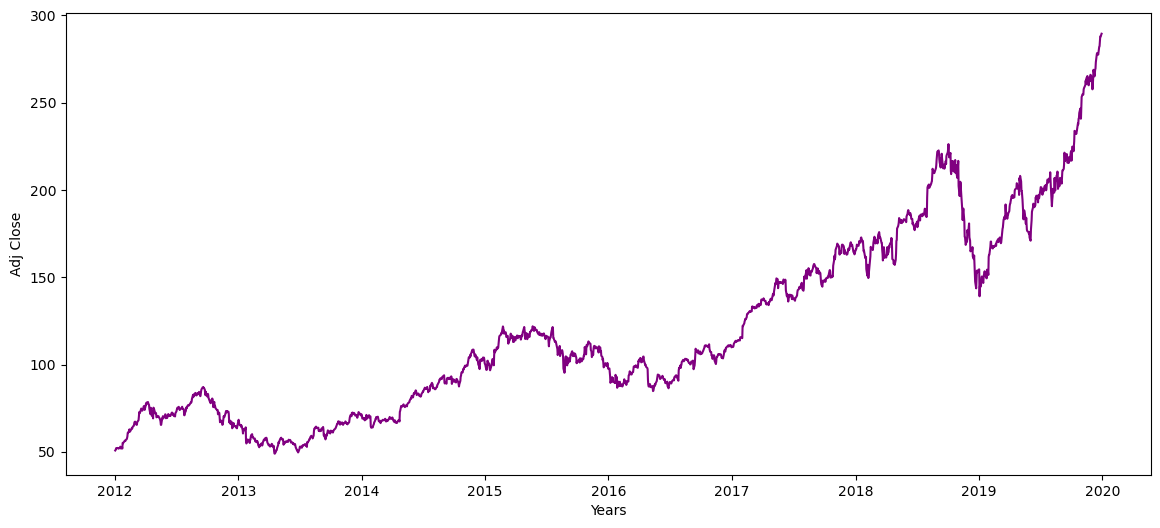

In [16]:
# Yearly chart
fig,ax=plt.subplots(figsize=(14,6))
plt.plot(df['Adj Close'],color = 'purple')
plt.xlabel('Years')
plt.ylabel('Adj Close')

<Axes: xlabel='Adj Close', ylabel='Density'>

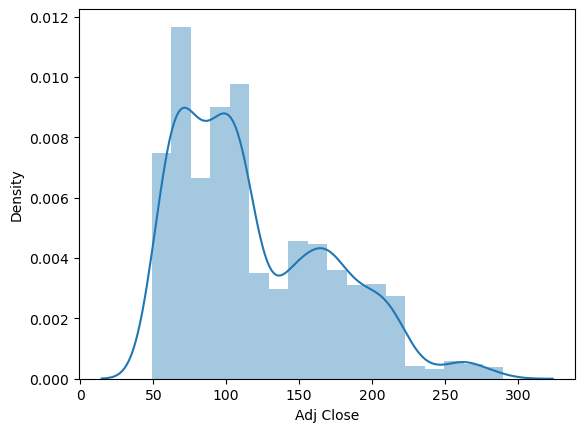

In [17]:
sns.distplot(df['Adj Close'],kde=True)

## 4.Time Series Component

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

Text(0.5, 0.98, 'Adj Close decomposition')

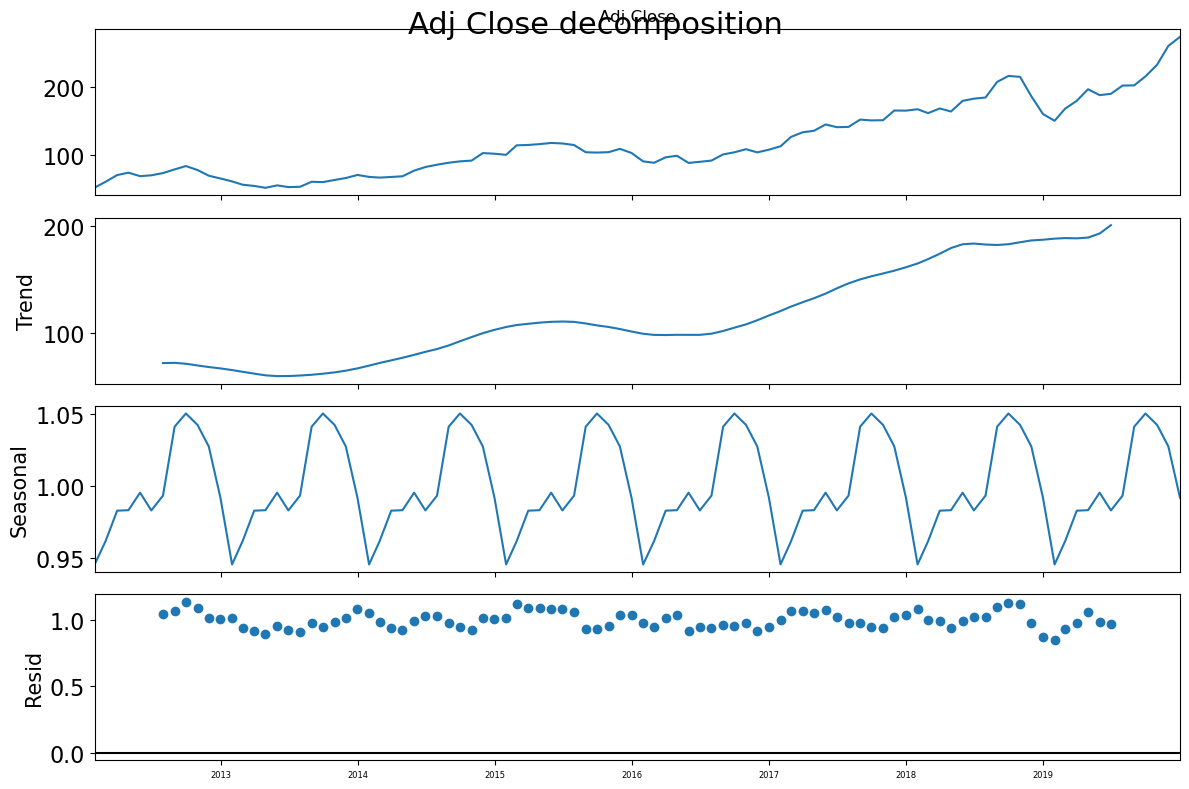

In [19]:
# Aggregating the Time Series to a monthly scaled index
# y = df[['Date','Adj Close']].copy()
# y.set_index('Date', inplace=True)
# y.index = pd.to_datetime(y.index)
y = df['Adj Close'].resample('1M').mean()

# Setting rcparams
rcParams['figure.figsize'] = 12, 8
rcParams['axes.labelsize'] = 15
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 6

# Using statistical tools of statsmodel library
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
decomp = decomposition.plot()
decomp.suptitle('Adj Close decomposition', fontsize=22)

From the above plot we can see that, the trend component is upward trend that means that closeing price is maximum in every year.

We can see that the seasonal component changes slowly over time & we can see there is repeating patterns so we can say that seasonality is present on our data.


### 4.1 Seasonal Subseries Plot

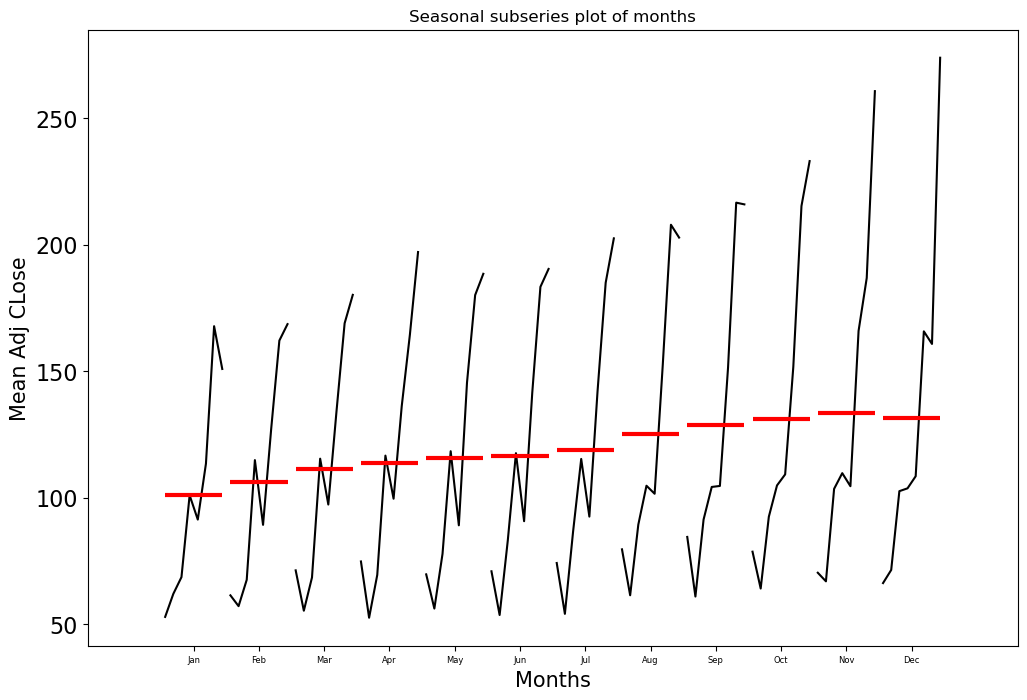

In [20]:
from statsmodels.graphics.tsaplots import quarter_plot,month_plot
month_plot(df['Adj Close'].resample('1M').mean())
plt.title('Seasonal subseries plot of months')
plt.xlabel('Months')
plt.ylabel('Mean Adj CLose')
plt.show()

In above Monthly chart we can see that there is no Monthly Seasonality

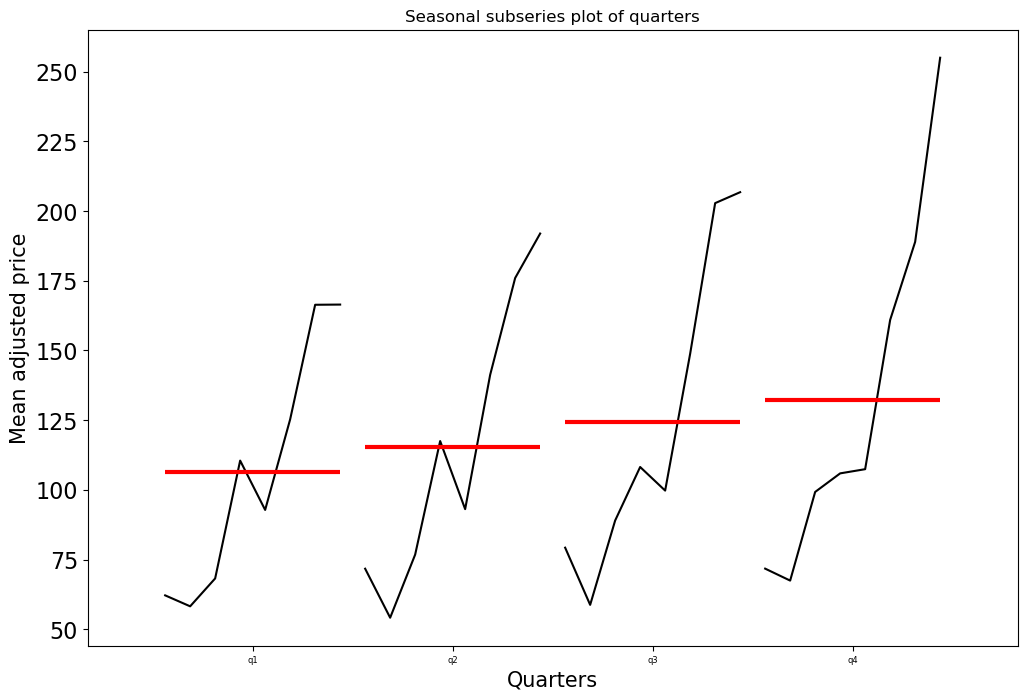

In [21]:
quarter_plot(df['Adj Close'].resample('Q').mean())
plt.title('Seasonal subseries plot of quarters')
plt.xlabel('Quarters')
plt.ylabel('Mean adjusted price')
plt.show()

Here we can se that Data has Quarterly Seasonality

## 5. Testing For Stationarity

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
# test_result=adfuller(df['Adj Close'])
# test_result

In [24]:
def adf_test(series, title=''):

    # .dropna() handles differenced data
    result = adfuller(series.dropna(),autolag='AIC')

    print('Agumented Dicky-Fuller test')
    labels = ['ADF test statistic :','p-value :','No. of Lags :']
    out = pd.Series(result[0:3],index=labels)

    for key,val in result[4].items():
        out['critical value ({}) :'.format(key)]=val

    # .to_string() removes the line "dtype: float64"
    print(out.to_string())

    if result[1] <= 0.05:
        print("\nReject the null hypothesis")
        print("Data is stationary")
    else:
        print("\nFail to reject the null hypothesis")
        print("Data is non-stationary")

In [25]:
adf_test(df['Adj Close'],title='')

Agumented Dicky-Fuller test
ADF test statistic :       1.252371
p-value :                  0.996328
No. of Lags :             17.000000
critical value (1%) :     -3.433662
critical value (5%) :     -2.863003
critical value (10%) :    -2.567549

Fail to reject the null hypothesis
Data is non-stationary


The test statistic is more than the critical values.
The p value is greater than 0.05,
 that's why we failed to reject null hypothesis

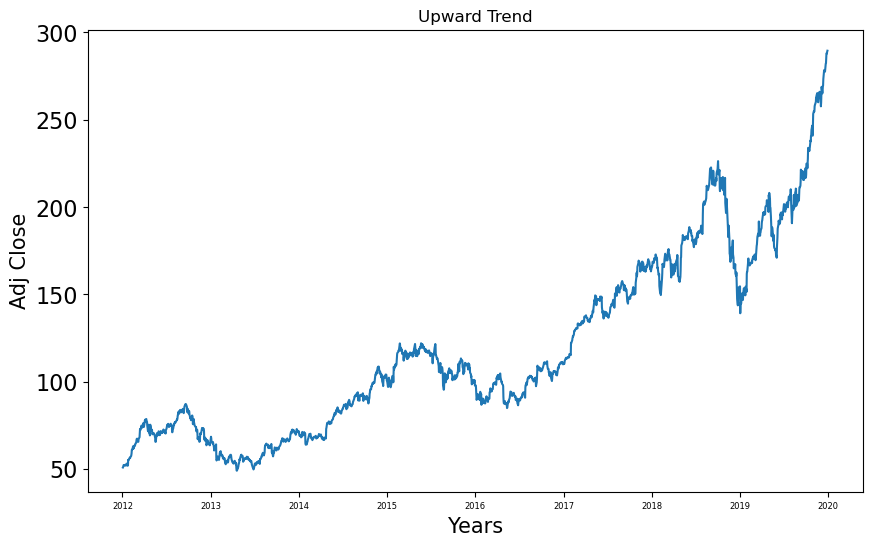

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df['Adj Close'])
plt.xlabel('Years')
plt.ylabel('Adj Close')
plt.title('Upward Trend')
plt.show()

In [27]:
# Differencing y(t)=y(t)-y(t-1)
df[' Adj Close First Difference'] = df['Adj Close'] -df['Adj Close'].shift(1)

In [28]:
# After differencing ADF test
adf_test(df[' Adj Close First Difference'].dropna())

Agumented Dicky-Fuller test
ADF test statistic :     -9.097047e+00
p-value :                 3.690851e-15
No. of Lags :             1.600000e+01
critical value (1%) :    -3.433662e+00
critical value (5%) :    -2.863003e+00
critical value (10%) :   -2.567549e+00

Reject the null hypothesis
Data is stationary


The test statistic is less than the critical values.
The p value is less than 0.05,
 that's why we can reject null hypothesis

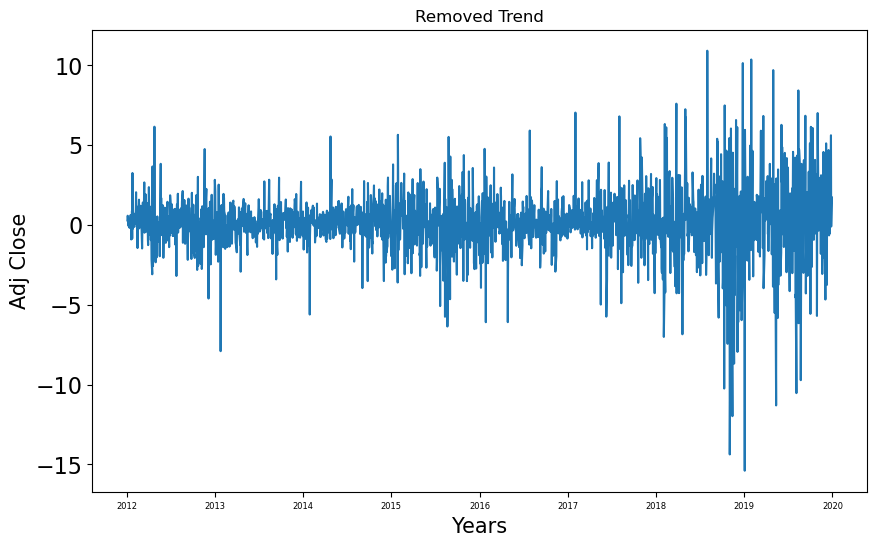

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(df[' Adj Close First Difference'])
plt.xlabel('Years')
plt.ylabel('Adj Close')
plt.title('Removed Trend')
plt.show()

After First Differencing Trend has been removed

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

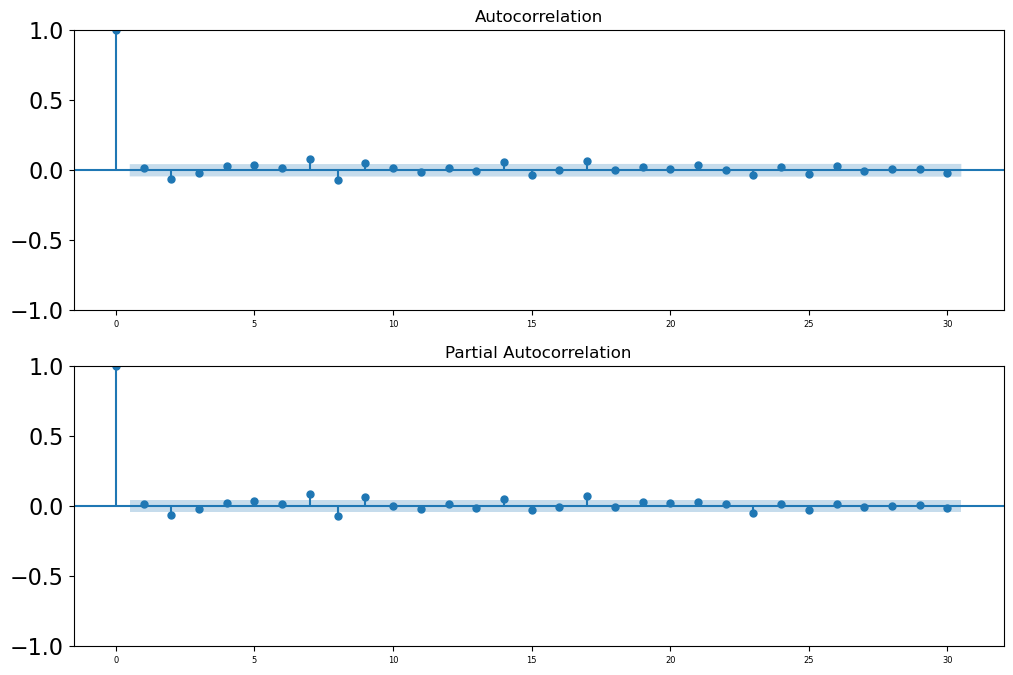

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df[' Adj Close First Difference'].iloc[2:],lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df[' Adj Close First Difference'].iloc[2:],lags=30,ax=ax2)

From the above plot we can see that,the ACF & PACF plot start with a lag zero(0) which is the correlation of the time series with itself & therefore results in correlation of 1 .

You can see that a blue area in the ACF & PACF plots indicate the 95% confidence interval & Is an indicator of the significant threshold.

From the plot we choose p=1 & q=1

## 6. Train/Test Split

In [32]:
# Split data into train and test
df_train=df.iloc[:1760]
df_test=df.iloc[1760:]

## 7. Model Building

### 7.1 ARIMA Model

In [33]:
from statsmodels.tsa.arima_model import ARIMA

In [34]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

From the above analysis, we can see that the P-value of ar.L1 model & ma.L1 model is 0.00 which is less than 0.05, that mean's our data has highly significant

#ARIMA Model


RMSE: 66.82204781140251
MSE: 4465.186073709363
MAPE: 0.26374136562976325


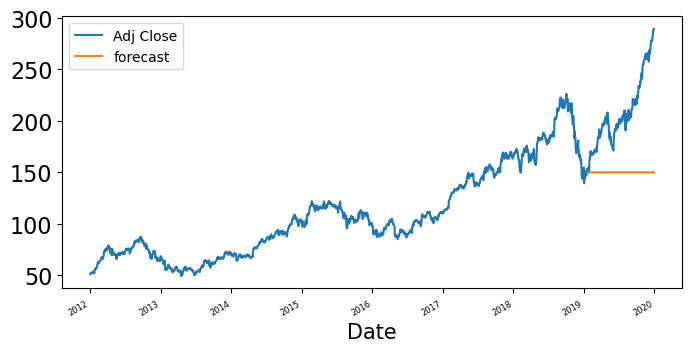

In [35]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
model = sm.tsa.arima.ARIMA(df_train['Adj Close'], order=(1,1,1))
model_fit = model.fit()
#print(model_fit.summary())

# Make predictions
df['forecast'] = model_fit.predict(start=1760, end=1994)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(df_test['Adj Close'], df['forecast'][1760:]))
mse = mean_squared_error(df_test['Adj Close'], df['forecast'][1760:])
mape = mean_absolute_percentage_error(df_test['Adj Close'], df['forecast'][1760:])


print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAPE: {mape}")

# Plot the results
df[['Adj Close','forecast']].plot(figsize=(8,4))
plt.show()

### 7.2 SARIMA Model(Monthly)

SARIMAX Model
RMSE: 59.951719925253805
MSE: 3594.208721996074
MAPE: 0.23450254115112862


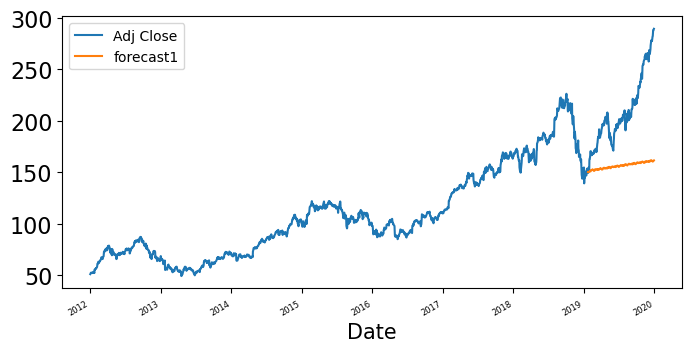

In [36]:

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

model1 = sm.tsa.statespace.SARIMAX(df_train['Adj Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 30))
model_fit1 = model1.fit()
#print(model_fit.summary())
df['forecast1'] = model_fit1.predict(start=1760, end=1994)

df0 = df[['Adj Close', 'forecast1']].iloc[1760:]
mape2 = np.mean(np.abs(df0['forecast1'] - df0['Adj Close']) / np.abs(df0['Adj Close']))
rmse2 = np.mean((df0['forecast1'] - df0['Adj Close']) ** 2) ** .5
mse2 = mean_squared_error(df0['Adj Close'], df0['forecast1'])


print(f"SARIMAX Model")
print(f"RMSE: {rmse2}")
print(f"MSE: {mse2}")
print(f"MAPE: {mape2}")

df[['Adj Close', 'forecast1']].plot(figsize=(8, 4))
plt.show()

### 7.3 SARIMA Model(Quaterly)

                                     SARIMAX Results                                     
Dep. Variable:                         Adj Close   No. Observations:                 1760
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood               -3591.086
Date:                           Wed, 29 Jan 2025   AIC                           7192.172
Time:                                   22:38:15   BIC                           7219.523
Sample:                               01-03-2012   HQIC                          7202.281
                                    - 01-22-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9709      0.048     20.364      0.000       0.877       1.064
ma.L1         -0.9635      0.052    -18.556

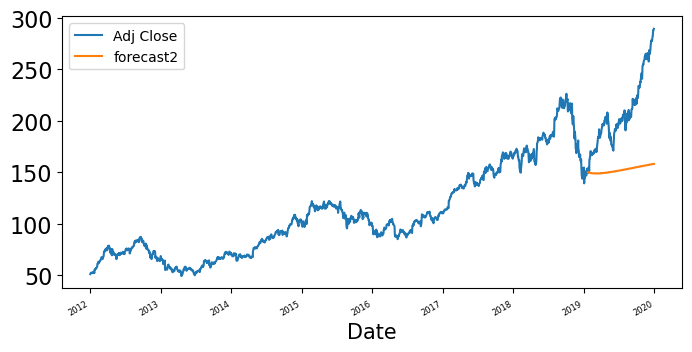

In [37]:

model2 = sm.tsa.statespace.SARIMAX(df_train['Adj Close'], order=(1,1,1), seasonal_order=(1,1,1,4)) # Changed seasonal_order for quarterly data
model2_fit = model2.fit()
print(model2_fit.summary())

# Predicting values
df['forecast2'] = model2_fit.predict(start=len(df_train), end=len(df)-1) # Use len(df_train) and len(df)-1 for prediction

# Evaluation Metrics
df0 = df[['Adj Close', 'forecast2']].iloc[len(df_train):]
mape3 = np.mean(np.abs(df0['forecast2'] - df0['Adj Close']) / np.abs(df0['Adj Close']))
rmse3 = np.mean((df0['forecast2'] - df0['Adj Close']) ** 2) ** .5
mse3 = mean_squared_error(df0['Adj Close'], df0['forecast2'])


print(f"SARIMAX Quarterly Model")
print(f"RMSE: {rmse3}")
print(f"MSE: {mse3}")
print(f"MAPE: {mape3}")

# Plotting results
df[['Adj Close','forecast2']].plot(figsize=(8,4))
plt.show()

In [38]:
'''model2=sm.tsa.statespace.SARIMAX(df_train['Adj Close'], order=(1,1,1),seasonal_order=(1,1,1,63))
model2_fit=model2.fit()
print(model2_fit.summary())'''

"model2=sm.tsa.statespace.SARIMAX(df_train['Adj Close'], order=(1,1,1),seasonal_order=(1,1,1,63))\nmodel2_fit=model2.fit()\nprint(model2_fit.summary())"

In [39]:
df1 = df[['Adj Close','forecast1','forecast2']].iloc[1760:]
df1

,Adj Close,forecast1,forecast2
Date,,,
2019-01-23,150.602600,150.043221,149.875756
2019-01-24,149.408875,149.936627,149.672654
2019-01-25,154.359848,150.190061,149.677559
2019-01-28,152.931305,150.199145,149.690965
2019-01-29,151.346207,150.372433,149.579945
...,...,...,...
2019-12-23,282.054138,160.716015,157.825994
2019-12-24,282.322266,160.369360,157.975641
2019-12-26,287.923645,160.500486,157.986486


#PROPHET MODEL


In [40]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Prepare data for Prophet
df_prophet = df.reset_index()
df_prophet = df_prophet[['Date', 'Adj Close']]
df_prophet.columns = ['ds', 'y']

# Split data into training and testing sets
df_train_prophet = df_prophet.iloc[:1760]
df_test_prophet = df_prophet.iloc[1760:]

# Create and fit the Prophet model
model_prophet = Prophet()
model_prophet.fit(df_train_prophet)

# Create future dataframe for predictions
future = model_prophet.make_future_dataframe(periods=len(df_test_prophet), freq=Cu)

# Make predictions
forecast = model_prophet.predict(future)


22:38:17 - cmdstanpy - INFO - Chain [1] start processing
22:38:18 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model
RMSE: 25.60797651341686
MSE: 655.7684611117096
MAPE: 0.10242667460646904


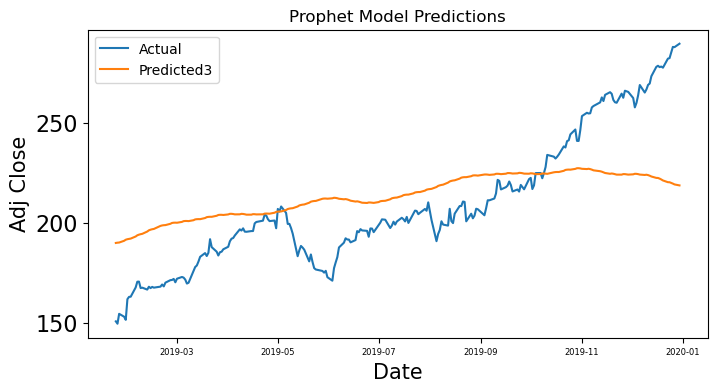

In [41]:


# Evaluate the model
y_true = df_test_prophet['y']
y_pred = forecast['yhat'][-len(y_true):]  # Select predictions corresponding to test set
rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred))
mse_prophet = mean_squared_error(y_true, y_pred)
mape_prophet = mean_absolute_percentage_error(y_true, y_pred)

print(f"Prophet Model")
print(f"RMSE: {rmse_prophet}")
print(f"MSE: {mse_prophet}")
print(f"MAPE: {mape_prophet}")

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(df_test_prophet['ds'], y_true, label='Actual')
plt.plot(df_test_prophet['ds'], y_pred, label='Predicted3')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Prophet Model Predictions')
plt.legend()
plt.show()

#LSTM MODEL

In [42]:
'''from keras.models import Sequential
from keras.layers import LSTM, Dense

# Data preprocessing for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(df_train['Adj Close'].values.reshape(-1, 1))
test_data = scaler.transform(df_test['Adj Close'].values.reshape(-1, 1))


def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10 # Example lookback period
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])


# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
print(f"LSTM Test RMSE: {testScore}")

# Calculate MSE
trainMSE = mean_squared_error(Y_train[0], train_predict[:,0])
print(f"LSTM Train MSE: {trainMSE}")
testMSE = mean_squared_error(Y_test[0], test_predict[:,0])
print(f"LSTM Test MSE: {testMSE}")

# Calculate MAPE
trainMAPE = mean_absolute_percentage_error(Y_train[0], train_predict[:,0])
print(f"LSTM Train MAPE: {trainMAPE}")
testMAPE = mean_absolute_percentage_error(Y_test[0], test_predict[:,0])
print(f"LSTM Test MAPE: {testMAPE}")


# shift train predictions for plotting
trainPredictPlot = np.empty_like(train_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df['Adj Close'].values.reshape(-1, 1)) # Changed to the shape of entire data
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict


# plot baseline and predictions
plt.figure(figsize=(10, 8))
plt.plot(scaler.inverse_transform(train_data), label='Actual Train')
plt.plot(trainPredictPlot, label='Predicted Train')
plt.plot(testPredictPlot, label='Predicted Test')
plt.legend()
plt.show()'''

'from keras.models import Sequential\nfrom keras.layers import LSTM, Dense\n\n# Data preprocessing for LSTM\nscaler = MinMaxScaler(feature_range=(0, 1))\ntrain_data = scaler.fit_transform(df_train[\'Adj Close\'].values.reshape(-1, 1))\ntest_data = scaler.transform(df_test[\'Adj Close\'].values.reshape(-1, 1))\n\n\ndef create_dataset(dataset, look_back=1):\n    X, Y = [], []\n    for i in range(len(dataset) - look_back - 1):\n        a = dataset[i:(i + look_back), 0]\n        X.append(a)\n        Y.append(dataset[i + look_back, 0])\n    return np.array(X), np.array(Y)\n\nlook_back = 10 # Example lookback period\nX_train, Y_train = create_dataset(train_data, look_back)\nX_test, Y_test = create_dataset(test_data, look_back)\n\n# Reshape input to be [samples, time steps, features] which is required for LSTM\nX_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))\nX_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))\n\n# Create and fit the LSTM network\nmodel =

In [43]:
# prompt: print all model which i performed i need comaprision  i need like table not in line

import pandas as pd

data = {
    'Model': ['ARIMA', 'SARIMAX (Monthly)', 'SARIMAX (Quarterly)', 'Prophet'],
    'RMSE': [rmse, rmse2, rmse3, rmse_prophet],
    'MSE': [mse, mse2, mse3, mse_prophet],
    'MAPE': [mape, mape2, mape3, mape_prophet]
}

df_results = pd.DataFrame(data)
df_results

,Model,RMSE,MSE,MAPE
0,ARIMA,66.822048,4465.186074,0.263741
1,SARIMAX (Monthly),59.951720,3594.208722,0.234503
2,SARIMAX (Quarterly),63.383752,4017.500075,0.253655
3,Prophet,25.607977,655.768461,0.102427


In [ ]:
# prompt: print all model which i performed i need comaprision  i need like table not in line

'''import pandas as pd

data = {'Model': ['ARIMA', 'SARIMA (Monthly)', 'SARIMA (Quarterly)', 'Prophet', 'LSTM'],
        'RMSE': [rmse, rmse2, rmse3, rmse_prophet, testScore],
        'MSE': [mse, mse2, mse3, mse_prophet, testMSE],
        'MAPE': [mape, mape2, mape3, mape_prophet, testMAPE]}
df_results = pd.DataFrame(data)
df_results'''

NameError: name 'testScore' is not defined

In [45]:

# Find the model with the lowest RMSE
best_model_rmse = df_results.loc[df_results['RMSE'].idxmin()]

# Find the model with the lowest MSE
best_model_mse = df_results.loc[df_results['MSE'].idxmin()]

# Find the model with the lowest MAPE
best_model_mape = df_results.loc[df_results['MAPE'].idxmin()]

print("Best model based on RMSE:\n", best_model_rmse)
print("\nBest model based on MSE:\n", best_model_mse)
print("\nBest model based on MAPE:\n", best_model_mape)

Best model based on RMSE:
 Model       Prophet
RMSE      25.607977
MSE      655.768461
MAPE       0.102427
Name: 3, dtype: object

Best model based on MSE:
 Model       Prophet
RMSE      25.607977
MSE      655.768461
MAPE       0.102427
Name: 3, dtype: object

Best model based on MAPE:
 Model       Prophet
RMSE      25.607977
MSE      655.768461
MAPE       0.102427
Name: 3, dtype: object


In [46]:

import pickle
best_model_name = best_model_rmse['Model']

if best_model_name == "ARIMA":
  best_model = model_fit
elif best_model_name == "SARIMA (Monthly)":
  best_model = model_fit1
elif best_model_name == "SARIMA (Quarterly)":
  best_model = model2_fit
elif best_model_name == "Prophet":
  best_model = model_prophet
elif best_model_name == "LSTM":
  best_model = model # Assuming 'model' is your LSTM model
else:
  print("Error: Unknown best model name.")
  best_model = None
if best_model:
  filename = 'best_model.pkl'
  pickle.dump(best_model, open(filename, 'wb'))
  print(f"Best model ({best_model_name}) saved to {filename}")

Best model (Prophet) saved to best_model.pkl
